<a href="https://colab.research.google.com/github/akhilps45/Machine_Learning_Models/blob/main/Logistic_Regression_titanicdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic wreck : Survived counts

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.shape

(891, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
data.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [14]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.drop_duplicates(inplace=True)

In [15]:
data.size

11760

In [16]:
data.drop(columns=['deck'],inplace = True)

In [17]:
data['age'] = data['age'].fillna(data['age'].mean())
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [18]:
data.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [20]:
data['survived'].value_counts()

,count
survived,
0,461
1,323


In [21]:
data.groupby('pclass')['survived'].value_counts

pclass  survived
1       1           135
        0            79
2       1            84
        0            81
3       0           301
        1           104
Name: count, dtype: int64

In [24]:
data.groupby('pclass')['fare'].mean()

,fare
pclass,
1,84.487812
2,21.835404
3,13.656223


In [25]:
data.select_dtypes(include=['number']).corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.332658,-0.043563,-0.036589,0.070307,0.246769
pclass,-0.332658,1.000000,-0.315200,0.088014,0.040296,-0.549216
age,-0.043563,-0.315200,1.000000,-0.208403,-0.084339,0.103238
sibsp,-0.036589,0.088014,-0.208403,1.000000,0.381433,0.135147
parch,0.070307,0.040296,-0.084339,0.381433,1.000000,0.191942
fare,0.246769,-0.549216,0.103238,0.135147,0.191942,1.000000


In [26]:
final_df = pd.get_dummies(data,drop_first=True)
final_df

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_C,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,False,True,False,True,True,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,True,False,False,False,False,False,True,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,False,True,False,True,False,True,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,False,True,False,False,False,True,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,False,True,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,False,False,False,True,False,False,True,False,True,True,False,False
887,1,1,19.0,0,0,30.0000,False,True,False,False,False,True,False,False,False,True,False,True,True
888,0,3,0.0,1,2,23.4500,False,False,False,False,False,True,False,True,False,True,False,True,False
889,1,1,26.0,0,0,30.0000,True,True,True,True,False,False,False,False,True,False,False,False,True


In [27]:
X = final_df.drop(columns=['survived'])
y = final_df['survived']

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [33]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0])

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[92,  0],
       [ 0, 65]])

In [37]:
accuracy_score(y_test,y_pred)

1.0

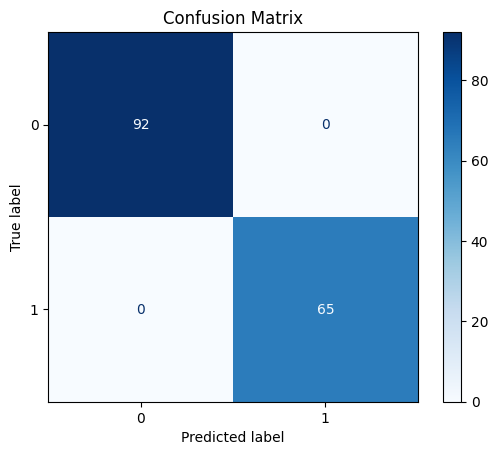

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()